# Uninsurance and Unemployment

In [8]:
import pandas as pd

# Load the data for the unemployment rate and uninsured rate
uninsured_by_county = pd.read_excel("./datasets/aspe-uninsured-estimates-by-county.xlsx", sheet_name=1)
unemployed_by_county = pd.read_excel("./datasets/bls-unemployed-stats-by-county-2020.xlsx")


In [9]:
# Merge the unemployment data with the uninsured data
joined_df = pd.concat([uninsured_by_county, unemployed_by_county], axis=1)

# Clean data
#joined_df.dropna(subset=["Percent Uninsured", "Unemployment Rate (%)", "Total Non-Elderly Population (Excluding Undocumented)", "Labor Force"], inplace=True)
joined_df = joined_df[joined_df["Unemployment Rate (%)"] != "N.A."]
joined_df.replace("**", 0, inplace=True)
joined_df["Unemployment Rate (%)"] /= 100


## Visuals of Unemployment Rate and Uninsurance Rate

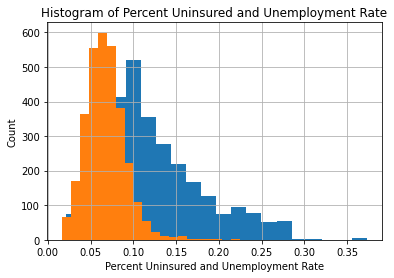

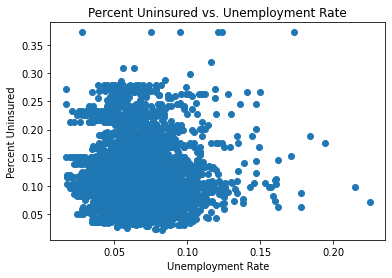

In [10]:
from matplotlib import pyplot as plt

joined_df["Percent Uninsured"].hist(bins=20)
joined_df["Unemployment Rate (%)"].hist(bins=20)
plt.xlabel("Percent Uninsured and Unemployment Rate")
plt.ylabel("Count")
plt.title("Histogram of Percent Uninsured and Unemployment Rate")
plt.show()

plt.scatter(joined_df["Unemployment Rate (%)"], joined_df["Percent Uninsured"])
plt.xlabel("Unemployment Rate")
plt.ylabel("Percent Uninsured")
plt.title("Percent Uninsured vs. Unemployment Rate")
plt.show()

We can see that although both percent uninsurance and unemployment rates have similar distributions, they are not at all correlated.

## What Other Variables Correlate with Uninsurance?

In [11]:
import numpy as np

# Drop all categorical columns
no_categorical = joined_df.drop(columns=["State Name", "FIPS Code", "County Name", "LAUS Code", "State FIPS Code", "County FIPS Code", "County Name/State Abbreviation", "Unnamed: 5", "Year"])

# Get the indices for percent uninsured and unemployment rate
pu_index = list(no_categorical.columns).index("Percent Uninsured")
ur_index = list(no_categorical.columns).index("Unemployment Rate (%)")

# Calculate a correlation coefficient matrix
A = np.corrcoef(no_categorical, rowvar=False)

# Sort the variables' correlation with percent uninsured, in increasing order
x = sorted([(column_name, value) for column_name, value in zip(no_categorical.columns, A[pu_index])], key=lambda x: abs(x[1]), reverse=True)

# Print the top 10 out (that aren't the percent uninsured itself)
for row in x[1:11]:
    print(row)

('Employed', -0.1253685386747601)
('Labor Force', -0.1232580355418897)
('Total Non-Elderly Population (Excluding Undocumented)', -0.11846189618250953)
('American Indian / Alaska Native', 0.1101397961824688)
('Unemployed', -0.1005180105089568)
('SNAP Recipient', 0.0677076551079456)
('HIU Income < 100% FPL', 0.05806924503342023)
('Asian / Native-Hawaiian / Pac Islander', -0.0558013266488515)
('Less than High School', 0.05140100165739355)
('Spanish/Hispanic/Latino Origin', 0.05098932178146017)


### Positive Correlations
We can see tha the following factors most positively with uninsurance rates in each county:
1. Number of American Indian / Alaska Natives who are uninsured
2. Number of SNAP (food stamps) receipients who are uninsured
3. Number of people whose income is below the poverty line who are uninsured
4. Number of people who completed less than high school education who are uninsured
5. Number of people who are of Spanish / Hispanic / Latino origin who are uninsured

Two of these factors (1 and 5) are related to racial demographics.
Two of these factors (2 and 3) are related to income.
One of these factors (4) is related to education.

### Negative Correlations
We can see that the following factors correlate most negatively with uninsurance rates in each county:
1. Total number of employed people
2. Total number of people in the labor force
3. Total number of Non-Elderly people (Excluding Unoducmented)
4. Total number of unemployed people
5. Number of Asians / Native Hawaiians / Pacific Islanders who are uninsured

Four of these factors (1,2,3,4) are related to population.
One of these factors (5) is related to racial demographics.